## Code and it's Results:

In [18]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords #for removal of stop words and stemming the words
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv('twitter_data.csv')
df.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [9]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [10]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [11]:
df['labels'] = df['class'].map({0:'Hate Speech', 1:'offensive language',
                                2:'No Hate or offensive languages'})


In [19]:
data = df[['tweet', 'labels']]
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate or offensive languages
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,"you've gone and broke the wrong heart baby, an...",No Hate or offensive languages
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,youu got wild bitches tellin you lies,offensive language


In [20]:
stop_words_set = set(stopwords.words('english')) #rename the variable

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
#import stemming
stemmer = nltk.SnowballStemmer('english')

In [25]:
def clean_data(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*d\W', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words_set])
    text = [stemmer.stem(word) for word in text.split()]
    return ' '.join(text)

data['tweet'] = data['tweet'].apply(clean_data)


C:\Users\HP\AppData\Local\Temp\ipykernel_22008\410162778.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(clean_data)


In [26]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean hou...,No Hate or offensive languages
1,rt mleew17 boy dat coldtyga dwn cuffin dat hoe...,offensive language
2,rt dawg rt 80sbaby4lif ever fuck bitch start c...,offensive language
3,rt cganderson look like tranni,offensive language
4,rt shenikarobert shit hear might true might fa...,offensive language
...,...,...
24778,yous muthafin lie 8220lifeask 20pearl coreyema...,offensive language
24779,youv gone broke wrong heart babi drove redneck...,No Hate or offensive languages
24780,young buck wanna eat dat nigguh like aint fuck...,offensive language
24781,youu got bitch tellin lie,offensive language


In [27]:
X = np.array(data['tweet'])
Y = np.array(data['labels'])

In [28]:
cv = CountVectorizer()
x = cv.fit_transform(X)

In [29]:
x_train, x_test, y_train, y_test = train_test_split (x, Y, test_size = 0.33, random_state = 42)

In [30]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 165,   49,  251],
       [  30, 1169,  180],
       [ 226,  284, 5825]], dtype=int64)

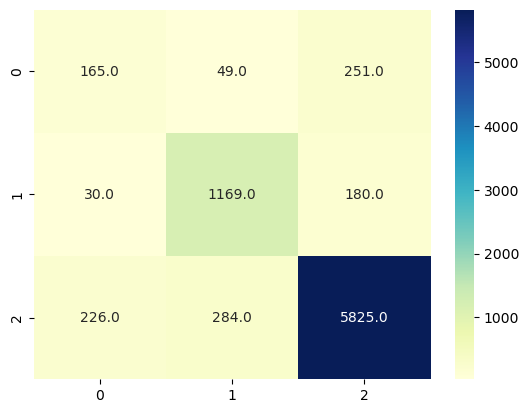

In [32]:
sns.heatmap(cm, annot=True, fmt='.1f', cmap = 'YlGnBu')
plt.show()

In [33]:
accuracy_score(y_test, y_pred)

0.8752903777967966

In [34]:
sample = input()
sample = clean_data(sample)
sample_vectorized = cv.transform([sample]).toarray()
print(sample_vectorized)
predicted_label = dt.predict(sample_vectorized)
print("Predicted label:", predicted_label)

I'll kill you!!
[[0 0 0 ... 0 0 0]]
Predicted label: ['Hate Speech']


## Conclusion:
The developed decision tree classifier effectively classifies tweets into categories of hate speech, offensive language, and non-offensive language, achieving a commendable accuracy of around 87.71%. This study highlights the potential of machine learning in automated content moderation on social media platforms. Future work may involve utilizing more advanced classification techniques and larger datasets to further enhance model performance and robustness, ultimately contributing to safer online environments.
